In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("Bengaluru_House_Data_csv1.csv")

In [4]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [5]:
df.shape

(13320, 9)

In [6]:
input_data=df.iloc[:,-1]
input_data

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [7]:
output_data=df["price"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.5)

In [10]:
x_train

5113      56.0
1386      74.0
8585      88.0
13305    220.0
2706     157.0
         ...  
10671    104.0
9585      85.0
6668      49.6
12838     56.0
9571      24.0
Name: price, Length: 6660, dtype: float64

In [11]:
x_train.shape

(6660,)

In [12]:
x_test

7398     237.50
5089      51.00
11703     64.11
7613      83.00
2524      65.00
          ...  
5833     120.00
10228     99.39
10654     34.00
5025      94.55
7516     350.00
Name: price, Length: 6660, dtype: float64

In [13]:
x_test.shape

(6660,)

In [14]:
y_train

5113      56.0
1386      74.0
8585      88.0
13305    220.0
2706     157.0
         ...  
10671    104.0
9585      85.0
6668      49.6
12838     56.0
9571      24.0
Name: price, Length: 6660, dtype: float64

In [15]:
y_train.shape

(6660,)

In [16]:
y_test

7398     237.50
5089      51.00
11703     64.11
7613      83.00
2524      65.00
          ...  
5833     120.00
10228     99.39
10654     34.00
5025      94.55
7516     350.00
Name: price, Length: 6660, dtype: float64

In [17]:
y_test.shape

(6660,)

In [18]:
df1=pd.read_excel(r"placement.xlsx")

In [19]:
df1.head()

,CGPA,Package (LPA)
0,6.1,3.2
1,6.5,3.5
2,6.8,3.7
3,7.0,4.0
4,7.2,4.1


In [20]:
df1.isnull().sum()

CGPA             0
Package (LPA)    0
dtype: int64

In [21]:
x=df1[["CGPA"]] #dependent variable
y=df1["Package (LPA)"]  #independent variable

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

<Axes: xlabel='CGPA', ylabel='Package (LPA)'>

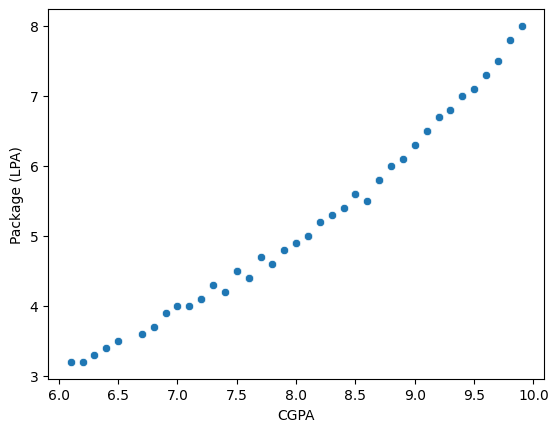

In [24]:
sns.scatterplot(x="CGPA",y="Package (LPA)",data=df1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
le=LinearRegression()

In [28]:
le.fit(x_train,y_train)

LinearRegression()

In [29]:
le.predict([[6.89]])

C:\Users\Ankita Ghavate\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.77741714])

In [30]:
# y=m*x+c lien of eq

In [31]:
m=le.coef_ 
m

array([1.22014974])

In [32]:
c=le.intercept_
c

-4.629414597837031

In [33]:
y=1.22014974*6.89-4.629414597837031
y

3.7774171107629693

In [34]:
y_pre=le.predict(x)

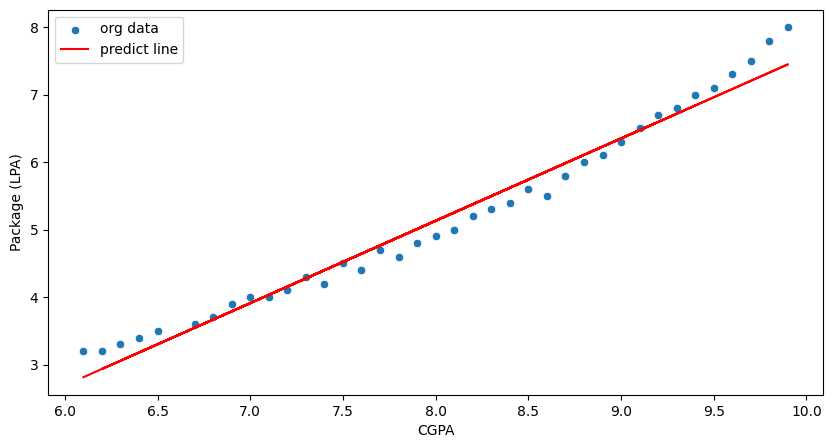

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="CGPA",y="Package (LPA)",data=df1)
plt.plot(df1["CGPA"],y_pre,c="red")
plt.savefig("predict.jpg")
plt.legend(["org data","predict line"])

In [36]:
df2=pd.read_excel("Salary Prediction.xlsx")

In [37]:
df2.head()

,Age,Experience (in years),Salary (in $)
0,22,1.0,35000
1,25,2.0,42000
2,28,3.0,50000
3,30,5.0,55000
4,35,7.0,62000


In [38]:
df2.shape

(49, 3)

In [39]:
df2.isnull().isnull().count()

Age                      49
Experience (in years)    49
Salary (in $)            49
dtype: int64

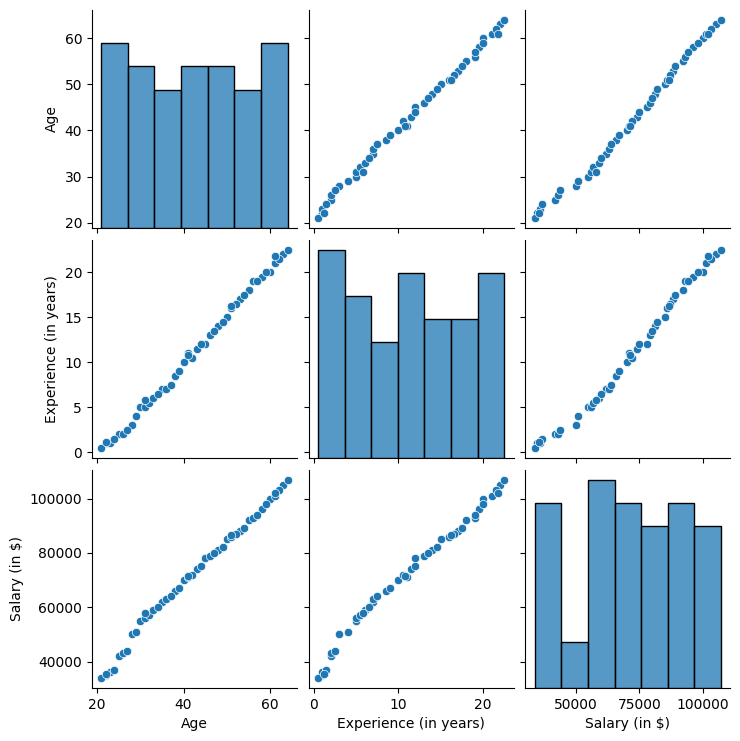

In [40]:
sns.pairplot(data=df2)

<Axes: >

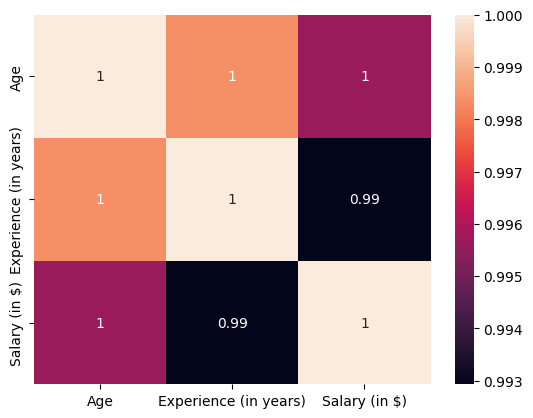

In [41]:
sns.heatmap(data=df2.corr(),annot=True)

In [42]:
x=df2.iloc[:,:-1]
x.head()

,Age,Experience (in years)
0,22,1.0
1,25,2.0
2,28,3.0
3,30,5.0
4,35,7.0


In [43]:
y=df2["Salary (in $)"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
le=LinearRegression()

In [47]:
le.fit(x_train,y_train)

LinearRegression()

In [48]:
# y=m1x1+m2x2+m3x3..+c eq of line

In [49]:
le.score(x_test,y_test)*100

98.38614928101998

In [50]:
le.coef_

array([ 2376.1218896 , -1370.00479793])

In [51]:
le.intercept_

-13738.799080620709

In [52]:
# y_pred=2376.1218896 * age+ -1370.00479793*experience-13738.799080620709

In [53]:
le.predict(x_test)

array([ 53070.95550732,  51974.95166898,  85249.33956248,  36891.87673307,
        85523.34052206,  88905.57950333,  81134.98444913,  72679.38699596,
        58144.31397922, 102434.5354284 ])

In [54]:
df3=pd.read_excel("polynomial_regre.xlsx")

In [55]:
df3.head()

,Level,Salary ($)
0,1,20000
1,2,25000
2,3,30000
3,4,40000
4,5,55000


Text(0, 0.5, 'Salary ($)')

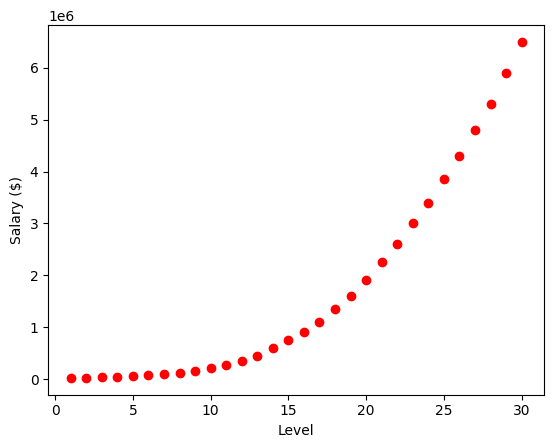

In [60]:
plt.scatter(df3["Level"],df3["Salary ($)"],color="r")
plt.xlabel("Level")
plt.ylabel("Salary ($)")

In [61]:
df3.corr()

,Level,Salary ($)
Level,1.000000,0.915683
Salary ($),0.915683,1.000000


In [62]:
x=df3[["Level"]]

In [64]:
y=df3["Salary ($)"]

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
pe=PolynomialFeatures(degree=2)

In [77]:
pe.fit(x)

PolynomialFeatures()

In [78]:
x=pe.transform(x) #transform into original data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
lr.score(x_test,y_test)*100

99.98560975379328

In [99]:
# y=m1x1+m2x2^2+c

In [100]:
lr.coef_

array([ 0.00000000e+00,  5.51697950e-08,  2.04403535e+04, -2.69322006e+03,
        7.27595761e-12,  2.04403535e+04, -2.69322006e+03, -2.69322006e+03,
        7.02819383e+02, -7.91529802e+00])

In [101]:
lr.intercept_

-26786.334632929415

In [94]:
y_pred=lr.predict(x)

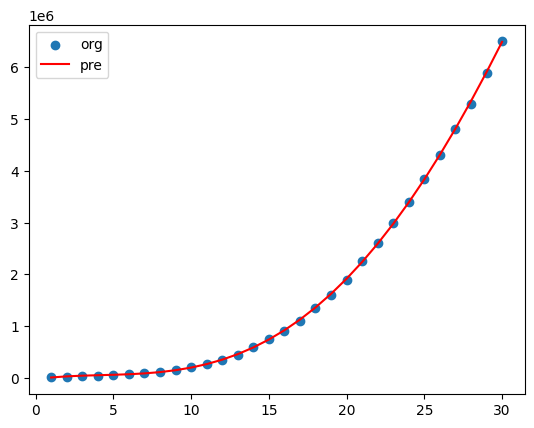

In [98]:
plt.scatter(df3["Level"],df3["Salary ($)"])
plt.plot(df3["Level"],y_pred,color="red")
plt.legend(["org","pre"])